# Problem statement
You can download train and test dataset from here. This dataset has 4 classes. Labels for
training data are provided, you have to submit labels of test data. Feel free to use any Machine
learning or Deep learning technique.


In [2]:
#standard utilities
 #to load pickle data


#data science and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, accuracy_score, 
                             confusion_matrix)  

#deep learning library
import keras
from keras.models import Sequential, load_model
from keras.layers import (Conv2D, MaxPooling2D, 
                          Dense, Flatten, 
                          Dropout, BatchNormalization)
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator


C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


Lets start by loading the dataset using pickle library and os library

Lets store feature dataset into train_images

Lets store the output value (target output) into train_labels

In [46]:
import os
import pickle
path=r'..\CV_problem'
with open(f'{path}\\drive_data\\train_image.pkl', 'rb') as image_file:
    train_images = pickle.load(image_file)
train_labels = np.array(np.load(f'{path}\\drive_data\\train_label.pkl', allow_pickle=True))    

Lets check the size of the dataset.

We may check that both the labels and features have same length

In [48]:
print(len(train_images))
print(len(train_labels))


8000
8000


we can see that the training dataset has 8000 samples

Now lets see what our traing dataset in first sample contains

In [49]:
print(type(train_images[0]))
print(len(train_images[0]))


<class 'list'>
784


Training dataset has a list of size 8000  each of which contains a list of 784 values which is quite intuitively pixel values

Now lets see what our traing labels in first datapoint contains

In [50]:
print(type(train_labels[0]))
print((train_labels[0]))
#this is an integer category only 


<class 'numpy.int32'>
0


In [8]:
#lets see what is the frequency of each label in the training labels
from collections import Counter
Counter(train_labels)

Counter({0: 2000, 2: 2000, 3: 2000, 6: 2000})

this is a very good dataset that contains the labels or the target_values in equal distribution each of size 2000

now we are known that training data has 8000 datapoint and the target_values which are categorical are also in equal distibution
in one of above cell we got to know that one datapoint has 784 values and there is no harm in assuming that the datapint is a 
vector flattened from 28*28 pixel matrix..   this also happens in MNIST dataset.. we can surely check our assumption by plotting the figure in next stage

In [51]:
#numpy array runs faster and considering the size of the dataset it is best to convert into numpy array
import numpy as np
train_images = np.array(train_images)

In [52]:
train_images.shape

(8000, 784)

We will now plot random 20 images to go ahead with our assumption of image values(train_images datapoint) of size 784 being flattened from 28*28 values

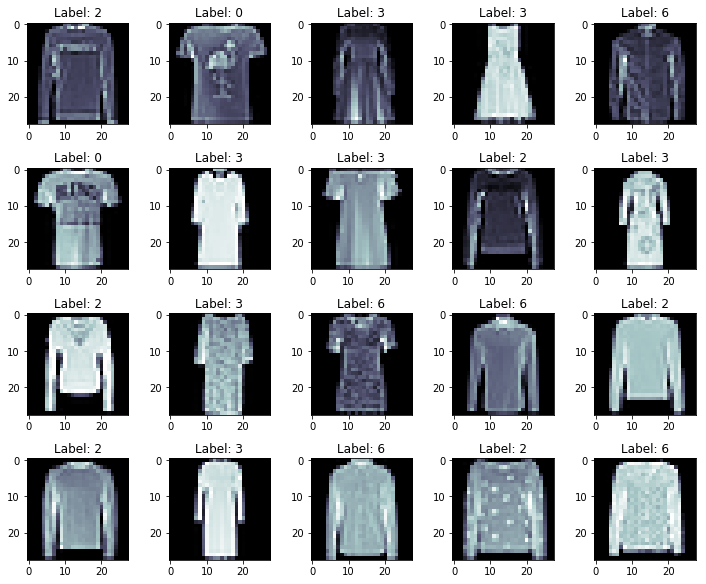

In [55]:
#indexing random 20 images for dataset visualisation
indexes=np.random.randint(0,8000,size=(21))
images = plt.figure(figsize=(10, 10))

#Showing first 20 images from the dataset 
for i in range(1,21):
    plt.subplot(5,5, i)
    #using cmap as plt.cm.bone for better visualisation
    plt.imshow(train_images[indexes[i]].reshape(28, 28),cmap=plt.cm.bone)
    plt.title(f'Label: {train_labels[indexes[i]]}') 
#for better visualisation    
images.tight_layout()  
plt.show()



After running the above cell there is no doubt that the assumption that we made regarding the shape of 28*28 was correct and also it was quite intuitive considering the basic mnist dataset resemblance of 784 matrix size and 28*28 flattening

After running the above random images multiple times it can be inferred that labels are categories of clothes
with label 0 being for half sleeve tshirts
with label 2 being for full sleeve tshirts
with label 3 being for other category clothes
with label 6 being for shirts

Now lets go ahead with Data pre processing and we only need to normalize in this step but before doing normalisation lets split the dataset into training and dev set

In [ ]:

Train_x, Val_x, Train_y, Val_y = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)